In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torch.distributions.multivariate_normal import MultivariateNormal
from torch.distributions.normal import Normal
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
import torch.optim as optim
from torch.autograd import Variable
import numpy.random as rand
import numpy as np
import sys
import os
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
from sklearn.metrics import fbeta_score
from scipy.stats import norm
from matplotlib import gridspec


from bnn import BNNBayesbyBackprop, gauss_logpdf
os.getcwd()

'/Users/d_berman/Documents/Tufts_Masters/Semester_3/Bayesian Deep Learning/BDL_final_project'

/anaconda3/envs/Pytorch/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
/anaconda3/envs/Pytorch/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


sklearn logistic regression accuracy is: 0.9292


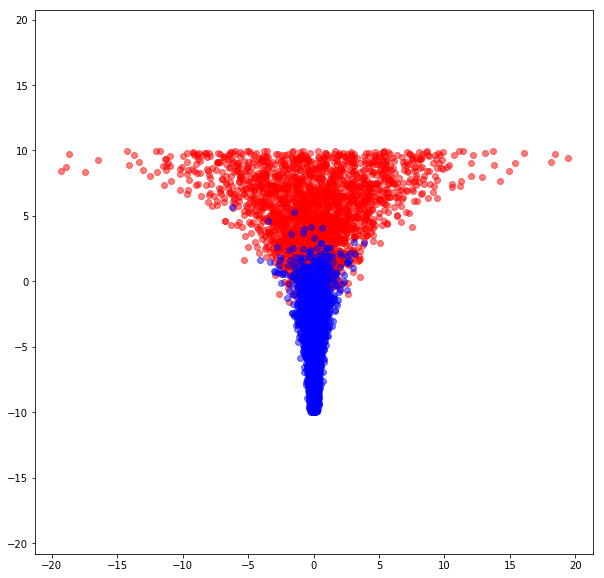

In [89]:
dataset_size = 5000

X_train = np.empty(shape=(dataset_size, 2), dtype=float)
y_train = np.empty(shape=(dataset_size,), dtype=float)

X_train[:, 0] = 0
X_train[:, 1] = np.random.uniform(-10, 10, 
                                  size=(int(dataset_size),))

for i, row_i in enumerate(X_train):
    # want b2=0 and w2_1=0.08
    X_train[i, 0] = np.random.normal(loc=0, scale=np.exp(0.2 * X_train[i, 1]))
    
dec_boundry = X_train[:, 0] * 0 + np.random.normal(0, 1.8, size=(X_train[:,0].shape))
y_train[X_train[:,1] >= dec_boundry] = 0
y_train[X_train[:,1] < dec_boundry] = 1

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.scatter(X_train[y_train == 0,0], X_train[y_train == 0,1], c='red', alpha=0.5)
ax.scatter(X_train[y_train == 1,0], X_train[y_train == 1,1], c='blue', alpha=0.5)
ax.axis('equal')
fig.show()
y_train

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
print('sklearn logistic regression accuracy is:', lr.score(X_train, y_train))

Data being saved in following file:
logging.csv
Epoch:  0 	Loss:  8133.5405 	acc:  0.1318
Epoch:  1 	Loss:  7407.683 	acc:  0.7466
Epoch:  2 	Loss:  7409.0146 	acc:  0.2596
Epoch:  3 	Loss:  7264.06 	acc:  0.643
Epoch:  4 	Loss:  6769.7974 	acc:  0.9282
Epoch:  5 	Loss:  6757.5103 	acc:  0.5628
Epoch:  6 	Loss:  6393.3813 	acc:  0.921
Epoch:  7 	Loss:  5692.6943 	acc:  0.3694
Epoch:  8 	Loss:  6002.7847 	acc:  0.1134
Epoch:  9 	Loss:  5489.6514 	acc:  0.9246
Epoch:  10 	Loss:  5096.531 	acc:  0.1608
Epoch:  11 	Loss:  4826.8965 	acc:  0.9186
Epoch:  12 	Loss:  5027.399 	acc:  0.7558
Epoch:  13 	Loss:  4260.377 	acc:  0.1892
Epoch:  14 	Loss:  4368.7354 	acc:  0.9164
Epoch:  15 	Loss:  4090.002 	acc:  0.1228
Epoch:  16 	Loss:  3912.967 	acc:  0.4172
Epoch:  17 	Loss:  3669.0806 	acc:  0.8166
Epoch:  18 	Loss:  3515.085 	acc:  0.929
Epoch:  19 	Loss:  3932.9607 	acc:  0.9262
Epoch:  20 	Loss:  3287.5383 	acc:  0.909
Epoch:  21 	Loss:  3395.2817 	acc:  0.912
Epoch:  22 	Loss:  3020.3354 	

Epoch:  191 	Loss:  843.8924 	acc:  0.9274
Epoch:  192 	Loss:  842.6356 	acc:  0.9278
Epoch:  193 	Loss:  842.6245 	acc:  0.9262
Epoch:  194 	Loss:  841.1842 	acc:  0.928
Epoch:  195 	Loss:  841.2593 	acc:  0.9272
Epoch:  196 	Loss:  841.3452 	acc:  0.9282
Epoch:  197 	Loss:  836.8427 	acc:  0.9296
Epoch:  198 	Loss:  841.0841 	acc:  0.9288
Epoch:  199 	Loss:  838.57196 	acc:  0.9274
Epoch:  200 	Loss:  840.1349 	acc:  0.9276
Epoch:  201 	Loss:  841.54987 	acc:  0.9274
Epoch:  202 	Loss:  837.29565 	acc:  0.9292
Epoch:  203 	Loss:  838.50934 	acc:  0.9292
Epoch:  204 	Loss:  837.4982 	acc:  0.9302
Epoch:  205 	Loss:  840.30676 	acc:  0.93
Epoch:  206 	Loss:  838.4613 	acc:  0.9272
Epoch:  207 	Loss:  839.7959 	acc:  0.93
Epoch:  208 	Loss:  838.757 	acc:  0.9284
Epoch:  209 	Loss:  837.55615 	acc:  0.9278
Epoch:  210 	Loss:  836.0749 	acc:  0.929
Epoch:  211 	Loss:  835.8695 	acc:  0.9286
Epoch:  212 	Loss:  835.6437 	acc:  0.9292
Epoch:  213 	Loss:  837.67236 	acc:  0.9284
Epoch:  214

Epoch:  382 	Loss:  817.3991 	acc:  0.9288
Epoch:  383 	Loss:  817.5245 	acc:  0.9294
Epoch:  384 	Loss:  816.9264 	acc:  0.9282
Epoch:  385 	Loss:  816.2987 	acc:  0.9268
Epoch:  386 	Loss:  816.6311 	acc:  0.93
Epoch:  387 	Loss:  816.2557 	acc:  0.9294
Epoch:  388 	Loss:  818.73096 	acc:  0.9288
Epoch:  389 	Loss:  816.77405 	acc:  0.9274
Epoch:  390 	Loss:  816.44073 	acc:  0.9302
Epoch:  391 	Loss:  818.6738 	acc:  0.9284
Epoch:  392 	Loss:  816.43945 	acc:  0.9296
Epoch:  393 	Loss:  815.98755 	acc:  0.9284
Epoch:  394 	Loss:  815.36487 	acc:  0.9284
Epoch:  395 	Loss:  815.6842 	acc:  0.9302
Epoch:  396 	Loss:  816.47485 	acc:  0.9296
Epoch:  397 	Loss:  814.51416 	acc:  0.9274
Epoch:  398 	Loss:  815.7782 	acc:  0.929
Epoch:  399 	Loss:  815.1586 	acc:  0.9282
Epoch:  400 	Loss:  816.69507 	acc:  0.9288
Epoch:  401 	Loss:  815.5999 	acc:  0.9266
Epoch:  402 	Loss:  814.67065 	acc:  0.9286
Epoch:  403 	Loss:  815.80225 	acc:  0.9282
Epoch:  404 	Loss:  815.6033 	acc:  0.928
Epoc

Epoch:  572 	Loss:  806.6512 	acc:  0.9278
Epoch:  573 	Loss:  806.3926 	acc:  0.9282
Epoch:  574 	Loss:  806.3299 	acc:  0.9282
Epoch:  575 	Loss:  807.86884 	acc:  0.9278
Epoch:  576 	Loss:  806.4664 	acc:  0.9274
Epoch:  577 	Loss:  806.63654 	acc:  0.9296
Epoch:  578 	Loss:  807.6423 	acc:  0.9286
Epoch:  579 	Loss:  806.4214 	acc:  0.9286
Epoch:  580 	Loss:  807.0062 	acc:  0.9292
Epoch:  581 	Loss:  806.356 	acc:  0.9272
Epoch:  582 	Loss:  806.4689 	acc:  0.9284
Epoch:  583 	Loss:  806.40295 	acc:  0.9302
Epoch:  584 	Loss:  805.5604 	acc:  0.9282
Epoch:  585 	Loss:  805.97546 	acc:  0.9288
Epoch:  586 	Loss:  806.5 	acc:  0.929
Epoch:  587 	Loss:  806.931 	acc:  0.9298
Epoch:  588 	Loss:  806.71063 	acc:  0.929
Epoch:  589 	Loss:  806.6727 	acc:  0.9282
Epoch:  590 	Loss:  806.4259 	acc:  0.9296
Epoch:  591 	Loss:  805.25116 	acc:  0.9286
Epoch:  592 	Loss:  805.90533 	acc:  0.9292
Epoch:  593 	Loss:  805.5668 	acc:  0.9292
Epoch:  594 	Loss:  805.8255 	acc:  0.929
Epoch:  595 

Epoch:  763 	Loss:  801.3302 	acc:  0.9292
Epoch:  764 	Loss:  801.3645 	acc:  0.9308
Epoch:  765 	Loss:  801.3575 	acc:  0.9298
Epoch:  766 	Loss:  801.0398 	acc:  0.9272
Epoch:  767 	Loss:  801.6189 	acc:  0.9284
Epoch:  768 	Loss:  801.77435 	acc:  0.9298
Epoch:  769 	Loss:  801.11835 	acc:  0.9288
Epoch:  770 	Loss:  802.5443 	acc:  0.9286
Epoch:  771 	Loss:  801.4422 	acc:  0.929
Epoch:  772 	Loss:  801.7943 	acc:  0.9284
Epoch:  773 	Loss:  800.74274 	acc:  0.9278
Epoch:  774 	Loss:  801.9299 	acc:  0.9298
Epoch:  775 	Loss:  801.938 	acc:  0.9302
Epoch:  776 	Loss:  801.5916 	acc:  0.9288
Epoch:  777 	Loss:  801.33295 	acc:  0.9284
Epoch:  778 	Loss:  800.89307 	acc:  0.929
Epoch:  779 	Loss:  802.1046 	acc:  0.9284
Epoch:  780 	Loss:  801.2301 	acc:  0.9294
Epoch:  781 	Loss:  801.1625 	acc:  0.9304
Epoch:  782 	Loss:  800.2577 	acc:  0.9296
Epoch:  783 	Loss:  801.3806 	acc:  0.928
Epoch:  784 	Loss:  801.51263 	acc:  0.9298
Epoch:  785 	Loss:  801.24805 	acc:  0.9276
Epoch:  

Epoch:  954 	Loss:  798.6069 	acc:  0.9284
Epoch:  955 	Loss:  799.0804 	acc:  0.9282
Epoch:  956 	Loss:  798.4817 	acc:  0.9294
Epoch:  957 	Loss:  798.6206 	acc:  0.9268
Epoch:  958 	Loss:  799.0507 	acc:  0.9292
Epoch:  959 	Loss:  799.1809 	acc:  0.9292
Epoch:  960 	Loss:  799.22473 	acc:  0.9284
Epoch:  961 	Loss:  798.99945 	acc:  0.9296
Epoch:  962 	Loss:  798.93994 	acc:  0.9288
Epoch:  963 	Loss:  798.38025 	acc:  0.9296
Epoch:  964 	Loss:  799.0187 	acc:  0.9292
Epoch:  965 	Loss:  797.44025 	acc:  0.9292
Epoch:  966 	Loss:  798.7118 	acc:  0.9292
Epoch:  967 	Loss:  798.6486 	acc:  0.9294
Epoch:  968 	Loss:  798.81586 	acc:  0.9294
Epoch:  969 	Loss:  798.73285 	acc:  0.9298
Epoch:  970 	Loss:  798.7875 	acc:  0.9292
Epoch:  971 	Loss:  798.5333 	acc:  0.9296
Epoch:  972 	Loss:  798.3268 	acc:  0.929
Epoch:  973 	Loss:  798.11426 	acc:  0.9298
Epoch:  974 	Loss:  798.6599 	acc:  0.9288
Epoch:  975 	Loss:  798.8008 	acc:  0.9288
Epoch:  976 	Loss:  797.4314 	acc:  0.9296
Epoc

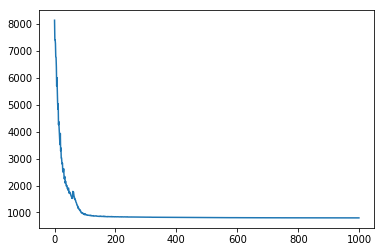

In [94]:
bnn = BNNBayesbyBackprop(input_dim=2, core_hidden_layers=[256]*4, 
                         mu_hidden_layers=[256]*7,
                         log_s_hidden_layers=[256]*7,
                         prior_mu=0.0, prior_s=1.0, num_MC_samples=100, classification=True)

# bnn = BNNBayesbyBackprop(input_dim=2, core_hidden_layers=[500], mu_hidden_layers=[10],
#                          log_s_hidden_layers=[500, 500, 500, 500],
#                          prior_mu=0.0, prior_s=1.0, num_MC_samples=100, classification=True)

bnn.fit(X_train, y_train, plot=True, n_epochs=1000, learning_rate=5e-3, batch_size=1000)

unbiased sample STD between 1 and -9: 0.323138794622749
unbiased sample STD between 1 and -8: 0.32598021801919563
unbiased sample STD between 1 and -7: 0.3675325764174147
unbiased sample STD between 1 and -6: 0.39490766360204177
unbiased sample STD between 1 and -5: 0.4472899216802434
unbiased sample STD between 1 and -4: 0.5111430011837356
unbiased sample STD between 1 and -3: 0.6080497552870315
unbiased sample STD between 1 and -2: 0.6861224270427705
unbiased sample STD between 1 and -1: 0.771611436997318
unbiased sample STD between 1 and 0: 0.9838752457692065
unbiased sample STD between 1 and 1: 1.1547383285644297
unbiased sample STD between 1 and 2: 1.516733542799809
unbiased sample STD between 1 and 3: 1.7289784680135762
unbiased sample STD between 1 and 4: 2.020634846470896
unbiased sample STD between 1 and 5: 2.519731613927503
unbiased sample STD between 1 and 6: 2.9415037430817783
unbiased sample STD between 1 and 7: 3.813229026774221
unbiased sample STD between 1 and 8: 4.5993

array([0.56723684, 0.570465  , 0.5921028 , 0.6260574 , 0.6214347 ,
       0.646571  , 0.6724908 , 0.6941356 , 0.75578517, 0.8118733 ,
       0.5232532 , 0.5285783 , 0.51930463, 0.5015841 , 0.5345171 ,
       0.5413617 , 0.53676826, 0.54032713, 0.5507122 , 0.55598754],
      dtype=float32)

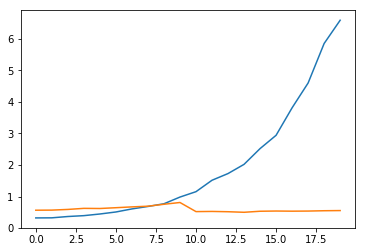

In [95]:
samples = 100
std_preds = np.empty(shape=(20,samples), dtype=np.float32)

for j in range(0,samples):
    # preds = bnn.model(X_train[X_train[:,1] <= -9])
    std_preds1 = []
    for i in range(-10, 10):
        preds = bnn.model(X_train[(X_train[:,1] >= i) & (X_train[:,1] < i + 1)])
#         print(np.mean(torch.exp(preds[:, 1]).detach().numpy().shape))
        std_preds[i,j] = np.mean(torch.exp(preds[:, 1]).detach().numpy())
        std_preds1.append(np.mean(torch.exp(preds[:, 1]).detach().numpy()))
    
emp_stds = []
for i in range(-10, 10):
    samp = X_train[(X_train[:,1] >= i) & (X_train[:,1] < i + 1)]
    mean = samp.mean(axis=0)
    samp_var = 1 / samp.shape[0] * np.sum(np.linalg.norm(samp - mean)**2 , axis=0)
    print('unbiased sample STD between {} and {}: {}'.format(1, i + 1, np.sqrt(samp_var)))
    emp_stds.append(np.sqrt(samp_var))

std_preds
plt.plot(emp_stds)
plt.plot(np.mean(std_preds, axis=1))
np.mean(std_preds, axis=1)

In [28]:
i = 9
preds = bnn.model(X_train[(X_train[:,1] >= i) & (X_train[:,1] < i + 1)])
np.mean(torch.exp(preds[:, 1]).detach().numpy())

0.5608351

(5000,) (5000,)


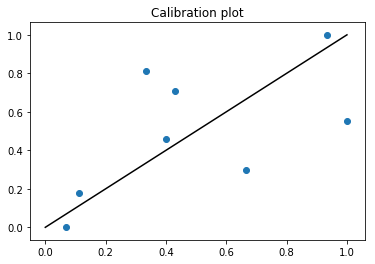

In [117]:
# bnn.model.l1.W_mu_DO.detach().numpy()
from sklearn.calibration import calibration_curve

n_bins = 8
calibration_mc_samples = 1000

sample_pred_list = []
for s in range(calibration_mc_samples):
    sample_pred = bnn.model(torch.tensor(X_train, dtype=torch.float), predict=True).detach().numpy()
    sample_pred_list.append(sample_pred)
    
# Each row is a sample, columns are datapoints; average across columns for probability
sample_preds = np.vstack(sample_pred_list).T
y_prob = np.mean(sample_preds, axis=1)
print(y_prob.shape, y_train.shape)
prob_true, prob_pred = calibration_curve(y_train, y_prob, n_bins=n_bins)

plt.scatter(prob_true, prob_pred)
plt.plot([i/10 for i in range(0, 11)], [i /10 for i in range(0, 11)], c='black')
plt.title('Calibration plot')
plt.show()